# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [113]:
import pandas as pd
import numpy as np

In [114]:
import seaborn as sns

### ipython magic to plot in a notebook

In [115]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [116]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

### Open the saved text in Jupyter

In [117]:
f = open('livedeal.txt','r')

### Convert opened file to Pandas dataframe.

In [118]:
k = f.readlines()

In [119]:
r = k[0].split(',')

In [120]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [121]:
testlist = []
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(headposition[i-1], headposition[i])
        #print(r[headposition[i-1] : headposition[i]])
        testlist.append(r[headposition[i-1] : headposition[i]])

In [122]:
df = pd.DataFrame(testlist)

In [123]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,"{""deals"":[{""deal"":{""id"":""4582""","""benchmarks"":{""values"":[501",718,1,524288000,10737418240,5242880,5242880,0,0,...,"""status"":1","""blockedBalance"":""182805093337395992""","""totalPayout"":""9391780562265354926""","""lastBillTS"":""2018-08-22T11:42:34Z""}","""netflags"":7","""askIdentityLevel"":3","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Qj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4Qj...",None
1,"{""deal"":{""id"":""3471""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""176334931959376""","""totalPayout"":""53707763345349850""","""lastBillTS"":""2018-08-22T11:42:13Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None
2,"{""deal"":{""id"":""4135""","""benchmarks"":{""values"":[503",866,1,256000000,67108864,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""0""","""totalPayout"":""0""","""lastBillTS"":""2018-08-22T11:41:04Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None
3,"{""deal"":{""id"":""1450""","""benchmarks"":{""values"":[102",513,6,4194304,67108864,1200,1001,0,0,...,"""status"":1","""blockedBalance"":""0""","""totalPayout"":""0""","""lastBillTS"":""2018-08-22T11:40:52Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None
4,"{""deal"":{""id"":""4692""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,2,8513388544,...,"""status"":1","""blockedBalance"":""991067211436687152""","""totalPayout"":""22123087748213336340""","""lastBillTS"":""2018-08-22T11:40:40Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None


## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [124]:
df[14]

0     "consumerID":"0xB4214d064518eed303D966F9ca0Fc6...
1     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
2     "consumerID":"0xEe7Ff0a44C62209aa7dAa450F67341...
3     "consumerID":"0x49f6C95B97C209F814c5b3B13428E9...
4     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
5     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
6     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
7     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
8     "consumerID":"0xe7517190DB97Ea55E985abdA33745A...
9     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
10    "consumerID":"0x417c92FbD944b125A578848DE44a4F...
11    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
12    "consumerID":"0xAAA932d77935EE3d8E0Ba1d464CFDA...
13    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
14    "consumerID":"0xF044524c6A30bC7559DEa1CB21fA11...
15    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
16    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
17    "consumerID":"0x417c92FbD944b125A578848DE4

### Make a little funtion to trim unnecessary charactors

In [125]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [126]:
df['consumer_ID'] = df[14].apply(Supplier_ID_conversion)

In [127]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""4582""","""benchmarks"":{""values"":[501",718,1,524288000,10737418240,5242880,5242880,0,0,...,"""blockedBalance"":""182805093337395992""","""totalPayout"":""9391780562265354926""","""lastBillTS"":""2018-08-22T11:42:34Z""}","""netflags"":7","""askIdentityLevel"":3","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Qj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4Qj...",None,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE
1,"{""deal"":{""id"":""3471""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""blockedBalance"":""176334931959376""","""totalPayout"":""53707763345349850""","""lastBillTS"":""2018-08-22T11:42:13Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb
2,"{""deal"":{""id"":""4135""","""benchmarks"":{""values"":[503",866,1,256000000,67108864,1000000,1000000,0,0,...,"""blockedBalance"":""0""","""totalPayout"":""0""","""lastBillTS"":""2018-08-22T11:41:04Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11
3,"{""deal"":{""id"":""1450""","""benchmarks"":{""values"":[102",513,6,4194304,67108864,1200,1001,0,0,...,"""blockedBalance"":""0""","""totalPayout"":""0""","""lastBillTS"":""2018-08-22T11:40:52Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9
4,"{""deal"":{""id"":""4692""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,2,8513388544,...,"""blockedBalance"":""991067211436687152""","""totalPayout"":""22123087748213336340""","""lastBillTS"":""2018-08-22T11:40:40Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [128]:
df[13]

0     "supplierID":"0x844cae5EADD22CaE667F37388D788f...
1     "supplierID":"0x8546601F9b4AcF1dc99C72cc48ED24...
2     "supplierID":"0x825FfDAB7d275dBAC844eFc36d5E8c...
3     "supplierID":"0x8546601F9b4AcF1dc99C72cc48ED24...
4     "supplierID":"0xC1bf17F560FA5BF79aF72B4314d147...
5     "supplierID":"0x7Cc1C96E6c20D6265531196d9ca2b3...
6     "supplierID":"0x7E74e1034bD9270482Fd286F03Cf7F...
7     "supplierID":"0x37d7Ae51C3421474709331898B278D...
8     "supplierID":"0xe8D423ca11ED809565BFA247d974d6...
9     "supplierID":"0xA0885038D127f628B3DC7f406004dE...
10    "supplierID":"0x2f1B94E3813d66967a478031889F23...
11    "supplierID":"0x26200241593722FA17DE5722Ed66d8...
12    "supplierID":"0x1E575FB7dD8b28CEcAD9065A7aFD1a...
13    "supplierID":"0x91E0fA215FEc1F7D905f59F7FE03F9...
14    "supplierID":"0xc364C71bAFAA85671C4d45E5Cf61bf...
15    "supplierID":"0x91E0fA215FEc1F7D905f59F7FE03F9...
16    "supplierID":"0x7Cc1C96E6c20D6265531196d9ca2b3...
17    "supplierID":"0x1a5d1841078be8d8f2b54D4F32

In [129]:
df['supplier_ID'] = df[13].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [130]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [131]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [132]:
df['price_USD/h'] = df[18].apply(Price_conversion)

###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [133]:
df[10]

0             0
1             0
2             0
3             0
4      59117000
5             0
6      64894000
7      85636000
8             0
9      79326000
10     30105000
11    219539000
12     21959000
13            0
14            0
15            0
16            0
17    239881000
18     19778000
19            0
20            0
21     12220000
22     22179000
23            0
24            0
25    159643000
26    129860000
27    186411000
28            0
29            0
30            0
Name: 10, dtype: object

In [134]:
float(df[10][0])/1000000

0.0

In [135]:
def Ethash_conversion(content):
    return float(content)/1000000

In [136]:
Ethash_conversion(df[10][0])

0.0

In [137]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [138]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""4582""","""benchmarks"":{""values"":[501",718,1,524288000,10737418240,5242880,5242880,0,0,...,"""netflags"":7","""askIdentityLevel"":3","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Qj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4Qj...",None,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0x844cae5EADD22CaE667F37388D788f79BDd97e62,0.010000,0.000
1,"{""deal"":{""id"":""3471""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0.000010,0.000
2,"{""deal"":{""id"":""4135""","""benchmarks"":{""values"":[503",866,1,256000000,67108864,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,0x825FfDAB7d275dBAC844eFc36d5E8ce632d8E7A0,0.000000,0.000
3,"{""deal"":{""id"":""1450""","""benchmarks"":{""values"":[102",513,6,4194304,67108864,1200,1001,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0.000000,0.000
4,"{""deal"":{""id"":""4692""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,2,8513388544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.052615,59.117


# Run statistics for suppliers

In [139]:
df.groupby('supplier_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
supplier_ID,,,,,,,,
0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,1.0,21.959,NaN,21.959,21.959,21.959,21.959,21.959
0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,1.0,239.881,NaN,239.881,239.881,239.881,239.881,239.881
0x26200241593722FA17DE5722Ed66d8830dc58C6D,1.0,219.539,NaN,219.539,219.539,219.539,219.539,219.539
0x2f1B94E3813d66967a478031889F230D805130Ec,1.0,30.105,NaN,30.105,30.105,30.105,30.105,30.105
0x323FB5f356088ae979F12f27f94013e449BC62df,1.0,0.000,NaN,0.000,0.000,0.000,0.000,0.000
0x37d7Ae51C3421474709331898B278D8bAB66eCac,1.0,85.636,NaN,85.636,85.636,85.636,85.636,85.636
0x47012859fC5cB44d6106D54ff77580c85C380ecc,1.0,22.179,NaN,22.179,22.179,22.179,22.179,22.179
0x672Ee945a55327328472B1a02437293945157f4C,1.0,186.411,NaN,186.411,186.411,186.411,186.411,186.411
0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,1.0,129.860,NaN,129.860,129.860,129.860,129.860,129.860


In [140]:
df10 = df.groupby('supplier_ID').describe()['Ethash']

In [141]:
df10.to_csv('eth.csv')

In [142]:
df11 = pd.read_csv('eth.csv')

In [143]:
df11['total_Ethash']= df11['count']*df11['mean']

In [144]:
df11[['supplier_ID','total_Ethash','count']]

,supplier_ID,total_Ethash,count
0,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,21.959,1.0
1,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,239.881,1.0
2,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0
3,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0
4,0x323FB5f356088ae979F12f27f94013e449BC62df,0.000,1.0
5,0x37d7Ae51C3421474709331898B278D8bAB66eCac,85.636,1.0
6,0x47012859fC5cB44d6106D54ff77580c85C380ecc,22.179,1.0
7,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
8,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
9,0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,12.220,1.0


In [145]:
df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

,supplier_ID,total_Ethash,count
1,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,239.881,1.0
2,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0
7,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
24,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0
8,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
5,0x37d7Ae51C3421474709331898B278D8bAB66eCac,85.636,1.0
17,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.326,1.0
12,0x7E74e1034bD9270482Fd286F03Cf7Fa26Bb99805,64.894,1.0
19,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,1.0
3,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0


In [146]:
df12 = df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [147]:
df12.to_csv('ethash.csv', index = False)

In [148]:
df13 = pd.read_csv('ethash.csv')

In [149]:
df13

,supplier_ID,total_Ethash,count
0,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,239.881,1.0
1,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0
2,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
3,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0
4,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
5,0x37d7Ae51C3421474709331898B278D8bAB66eCac,85.636,1.0
6,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.326,1.0
7,0x7E74e1034bD9270482Fd286F03Cf7Fa26Bb99805,64.894,1.0
8,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,1.0
9,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0


In [150]:
df13['total_Ethash'].sum()

1330.5480000000002

In [151]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s')

Real-time total Ethash rate of the entire SONM platform is 1330.548 Mh/s


## supplier's revenue

In [152]:
df13['supplier_ID'][0]

'0x1a5d1841078be8d8f2b54D4F3264438a69e94C94'

In [153]:
df[df.supplier_ID == df13['supplier_ID'][0]]['price_USD/h'].sum()

0.21357987299999998

In [154]:
def total_revenue(address):
    return df[df.supplier_ID == address]['price_USD/h'].sum()

In [155]:
total_revenue(df13['supplier_ID'][0])

0.21357987299999998

In [156]:
df13['total_revenue_USD/h'] = df13['supplier_ID'].apply(total_revenue)

In [157]:
df13.dtypes

supplier_ID             object
total_Ethash           float64
count                  float64
total_revenue_USD/h    float64
dtype: object

In [158]:
df13['total_revenue_USD/d'] = df13['total_revenue_USD/h'] *24

In [159]:
df13['revenue_USD/d'] = df13['total_revenue_USD/d'].map('${:,.2f}'.format)

In [160]:
df13.head()

,supplier_ID,total_Ethash,count,total_revenue_USD/h,total_revenue_USD/d,revenue_USD/d
0,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,239.881,1.0,0.213580,5.125917,$5.13
1,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0,0.226000,5.424000,$5.42
2,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0,0.186366,4.472783,$4.47
3,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0,0.162238,3.893711,$3.89
4,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0,0.141309,3.391426,$3.39


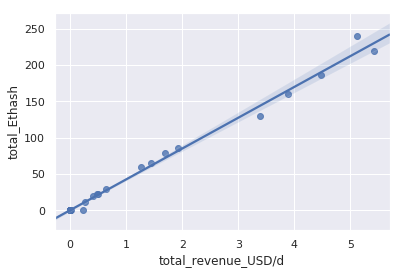

In [161]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/d", data=df13)

In [162]:
sns.set()

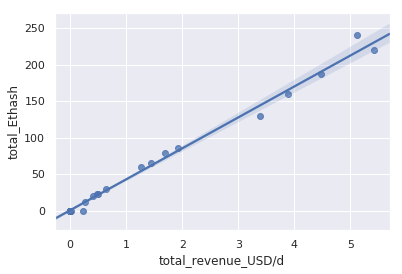

In [163]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/d", data=df13)

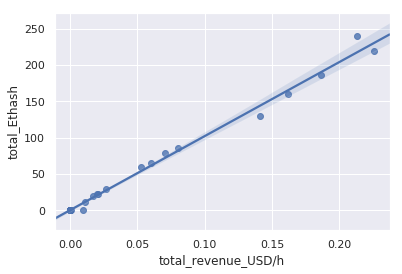

In [164]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df13)

In [165]:
df13[['supplier_ID','total_Ethash','count','revenue_USD/d']]

,supplier_ID,total_Ethash,count,revenue_USD/d
0,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,239.881,1.0,$5.13
1,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0,$5.42
2,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0,$4.47
3,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0,$3.89
4,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0,$3.39
5,0x37d7Ae51C3421474709331898B278D8bAB66eCac,85.636,1.0,$1.92
6,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.326,1.0,$1.69
7,0x7E74e1034bD9270482Fd286F03Cf7Fa26Bb99805,64.894,1.0,$1.45
8,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,1.0,$1.26
9,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0,$0.64


# Run the same statistics for consumers

In [166]:
df.groupby('consumer_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,16.0,55.023875,77.045399,0.000,0.000,6.110,96.692,219.539
0x417c92FbD944b125A578848DE44a4FD9132E0911,5.0,85.641400,89.380593,19.778,30.105,59.117,79.326,239.881
0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.959,21.959
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000
0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000
0xF044524c6A30bC7559DEa1CB21fA11b1f5817833,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000
0xc620838fcaec0e5559aa111f77FC6016650c63E4,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000


In [167]:
df10 = df.groupby('consumer_ID').describe()['Ethash']

In [168]:
df10.to_csv('consumer.csv')

In [169]:
df11 = pd.read_csv('consumer.csv')

In [170]:
df11['total_Ethash']= df11['mean']*df11['count']

In [171]:
df11

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,16.0,55.023875,77.045399,0.000,0.000,6.110,96.692,219.539,880.382
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,5.0,85.641400,89.380593,19.778,30.105,59.117,79.326,239.881,428.207
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000,0.000
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.959,21.959,21.959
5,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000,0.000
6,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000,0.000
7,0xF044524c6A30bC7559DEa1CB21fA11b1f5817833,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000,0.000
8,0xc620838fcaec0e5559aa111f77FC6016650c63E4,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000,0.000
9,0xe7517190DB97Ea55E985abdA33745AfC41a83592,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000,0.000


In [172]:
df11[['consumer_ID', 'total_Ethash', 'count']]

,consumer_ID,total_Ethash,count
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,880.382,16.0
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,428.207,5.0
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0.000,3.0
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,0.000,1.0
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,21.959,1.0
5,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0.000,1.0
6,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,0.000,1.0
7,0xF044524c6A30bC7559DEa1CB21fA11b1f5817833,0.000,1.0
8,0xc620838fcaec0e5559aa111f77FC6016650c63E4,0.000,1.0
9,0xe7517190DB97Ea55E985abdA33745AfC41a83592,0.000,1.0


# Connor's deals

In [173]:
df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash
4,"{""deal"":{""id"":""4692""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,2,8513388544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.052615,59.117
9,"{""deal"":{""id"":""4723""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000000,1000000,4,6372196352,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.070450,79.326
10,"{""deal"":{""id"":""4724""","""benchmarks"":{""values"":[104",1062,4,512000000,67108864,1000000,1000000,1,8512339968,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2f1B94E3813d66967a478031889F230D805130Ec,0.026753,30.105
17,"{""deal"":{""id"":""4720""","""benchmarks"":{""values"":[103",1141,2,512000001,67108864,1000000,1000001,7,4238344192,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,0.213580,239.881
18,"{""deal"":{""id"":""4718""","""benchmarks"":{""values"":[108",1113,8,512000000,67108864,1000000,1000001,1,6368002048,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Nk...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.017390,19.778


In [174]:
df12 = df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

In [175]:
df12[['consumer_ID', 'supplier_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,price_USD/h,Ethash,0
4,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.052615,59.117,"{""deal"":{""id"":""4692"""
9,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.070450,79.326,"{""deal"":{""id"":""4723"""
10,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2f1B94E3813d66967a478031889F230D805130Ec,0.026753,30.105,"{""deal"":{""id"":""4724"""
17,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,0.213580,239.881,"{""deal"":{""id"":""4720"""
18,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.017390,19.778,"{""deal"":{""id"":""4718"""
